In [3]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

operating_system = 'mac'

if operating_system == 'win':
    os.chdir('C:/Users/fabau/OneDrive/Documents/GitHub/master-project-cleaned/')
elif operating_system == 'curnagl':
    os.chdir('/work/FAC/FGSE/IDYST/tbeucler/default/fabien/repos/cleaner_version/')
else:
    os.chdir('/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/')

# Add the path to the custom library
custom_library_path = os.path.abspath('util/processing/')
sys.path.append(custom_library_path)

import extraction_squares

'''if operating_system == 'curnagl':
    name_of_variable= pd.read_csv('/work/FAC/FGSE/IDYST/tbeucler/default/fabien/repos/curnagl/DATASETS/variable_list_80_mean.csv')
    path_data = '/work/FAC/FGSE/IDYST/tbeucler/default/fabien/repos/curnagl/DATASETS'
else:'''
name_of_variable= pd.read_csv('data/variable_list_levels.csv')
path_data = 'data'

storm_dates = pd.read_csv('pre_processing/tracks/storm_dates.csv')
path_tracks_1h = 'pre_processing/tracks/ALL_TRACKS/tracks_1h'
#path_tracks_1h_non_EU = 'pre_processing/tracks/ALL_TRACKS/tracks_1h_non_EU'
dataset = 'datasets_1h'
#dataset_non_EU = 'datasets_1h_non_EU'

In [11]:
# open time series data

stats = ['max', 'min', 'mean', 'std']
name_of_variable_levels = pd.read_csv('data/variable_list_levels.csv')

# shape all_data as the timeseries data
data_list = []
data_list_y = []
y_var_name = []
x_var_name = []

for var in name_of_variable_levels['variables']:
    if var == 'sea_surface_temperature':
        continue
    for stat in stats:
        var_stat = f'{var}_{stat}'
        if var_stat == f'instantaneous_10m_wind_gust_{stat}':
            storm_data = []
            var_temp = pd.read_csv(f'data/time_series_1h_non_EU/{var}/{var}_{stat}.csv')
            var_temp = var_temp.drop(columns=['Unnamed: 0'])
            '''var_temp = var_temp.to_numpy()
            name = np.repeat(var_stat, var_temp.shape[0])
            name = name[:, np.newaxis]
            var_temp = np.concatenate((name, var_temp), axis=1)'''
            storm_data.append(var_temp)
            y_var_name.append(var_stat)

            data_list_y.append(storm_data)
        else :
            storm_data = []
            var_temp = pd.read_csv(f'data/time_series_1h_non_EU/{var}/{var}_{stat}.csv')
            var_temp = var_temp.drop(columns=['Unnamed: 0'])
            '''var_temp = var_temp.to_numpy()
            name = np.repeat(var_stat, var_temp.shape[0])
            name = name[:, np.newaxis]
            var_temp = np.concatenate((name, var_temp), axis=1)'''
            storm_data.append(var_temp)
            x_var_name.append(var_stat)

            data_list.append(storm_data)

# order of the data: storm, step, variable_stat
all_data = np.stack(data_list, axis=3)
all_data = np.concatenate(all_data, axis=0)

all_data_y = np.stack(data_list_y, axis=3)
all_data_y = np.concatenate(all_data_y, axis=0)

In [8]:
stats = ['max', 'min', 'mean', 'std']
name_of_variable_levels = pd.read_csv('data/variable_list_levels.csv')

# shape all_data as the timeseries data
all_vars = {}
data_list_y = []
y_var_name = []
x_var_name = []

for var in name_of_variable_levels['variables']:
    if var == 'sea_surface_temperature':
        continue
    for stat in stats:
        var_stat = f'{var}_{stat}'
        #if var_stat == f'instantaneous_10m_wind_gust_{stat}':
        #storm_data = []
        var_temp = pd.read_csv(f'data/time_series_1h_non_EU/{var}/{var}_{stat}.csv')
        var_temp = var_temp.drop(columns=['Unnamed: 0', 'storm_index'])
        #var_temp_2 = var_temp.drop(columns=['storm_index'])
        var_temp_reshape = var_temp.to_numpy().reshape((var_temp.shape[0]*var_temp.shape[1]))
        all_vars[f'{var_stat}'] = var_temp_reshape

# Assuming all_vars is populated as a dictionary
df_all_vars = pd.DataFrame(all_vars)

# Display the DataFrame
print(df_all_vars)

      10m_u_component_of_wind_max  10m_u_component_of_wind_min  \
0                       26.339813                   -19.348663   
1                       27.664276                   -19.224396   
2                       27.523850                   -17.975174   
3                       25.106613                   -17.092606   
4                       23.259277                   -15.570801   
...                           ...                          ...   
2263                    16.063522                    -8.414993   
2264                    15.060211                    -7.722015   
2265                    14.267822                    -7.458740   
2266                    14.012863                    -7.385574   
2267                    14.116516                    -8.904968   

      10m_u_component_of_wind_mean  10m_u_component_of_wind_std  \
0                         8.450219                    13.002162   
1                         9.398441                    12.493799   
2     

In [12]:
# reshape the X_training into a 2D array

X_train = all_data
y_train = all_data_y

X_all_2d = X_train.reshape(X_train.shape[0]*X_train.shape[1],X_train.shape[2])
# same for y_all_3d
y_all_2d = y_train.reshape(y_train.shape[0]*y_train.shape[1],y_train.shape[2])

# drop all the rows with nan values

X_all_2d = pd.DataFrame(X_all_2d)
X_all_2d_non_na = X_all_2d.dropna()
y_all_2d = pd.DataFrame(y_all_2d)
y_all_2d_non_na = y_all_2d.dropna()

# rename the columns by the name of the variables by adding also the stat of the variable (max, min, mean, std)

stats = ['max', 'min', 'mean', 'std']
var_stat = []
var_stat_all = []

for var in name_of_variable['variables']:
    for stat in stats:
        var_stat = f'{var}_{stat}'
        var_stat_all.append(var_stat)

# drop instantaneous variables, u and v wind components

var_stat_all_x = [var for var in var_stat_all if 'inst' not in var]
instantaneous = ['instantaneous_10m_wind_gust_max', 'instantaneous_10m_wind_gust_min', 'instantaneous_10m_wind_gust_mean', 'instantaneous_10m_wind_gust_std']

X_all_2d_non_na.columns = var_stat_all_x
y_all_2d_non_na.columns = instantaneous

y_mean = y_all_2d_non_na.drop(columns=['instantaneous_10m_wind_gust_max', 'instantaneous_10m_wind_gust_min', 'instantaneous_10m_wind_gust_std'])
y_max = y_all_2d_non_na.drop(columns=['instantaneous_10m_wind_gust_min', 'instantaneous_10m_wind_gust_mean', 'instantaneous_10m_wind_gust_std'])

ValueError: Length mismatch: Expected axis has 368 elements, new values have 372 elements

In [12]:
# drop columns with 10m_u_component_of_wind and 10m_v_component_of_wind variables

X_all_2d_non_na = X_all_2d_non_na.drop(columns=['10m_u_component_of_wind_max', 
                                                '10m_u_component_of_wind_min', 
                                                '10m_u_component_of_wind_mean', 
                                                '10m_u_component_of_wind_std', 
                                                '10m_v_component_of_wind_max', 
                                                '10m_v_component_of_wind_min', 
                                                '10m_v_component_of_wind_mean', 
                                                '10m_v_component_of_wind_std'])

var_stat_all_x = [var for var in var_stat_all_x if '10m' not in var]

Text(0.5, 1.0, 'Correlation matrix for all variables')

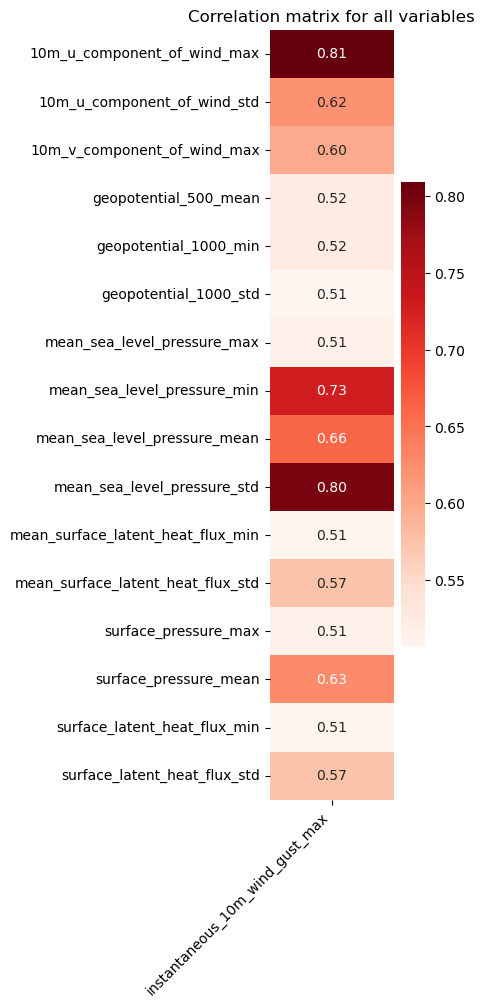

In [50]:
#del all_data

# combine the X and y datasets

#all_data = pd.concat([X_all_2d_non_na, y_all_2d_non_na], axis=1)

# create the correlation matrix

dataset = df_all_vars

corr_matrix = dataset.corr()
corr_matrix_abs = abs(corr_matrix)
#corr_inst = corr_matrix_abs.iloc[-4:, :-4]
corr_inst = corr_matrix_abs.loc['instantaneous_10m_wind_gust_max']
#corr_inst = corr_matrix_abs.iloc[var_stat_all.index('instantaneous_10m_wind_gust_max'):var_stat_all.index('instantaneous_10m_wind_gust_std')+1]
#corr_inst = corr_inst.iloc[:, :-4]
corr_inst = pd.DataFrame(corr_inst)
corr_inst = corr_inst.drop(index = ['instantaneous_10m_wind_gust_max', 'instantaneous_10m_wind_gust_min', 'instantaneous_10m_wind_gust_mean', 'instantaneous_10m_wind_gust_std'])
corr_inst_sel_05 = corr_inst[corr_inst > 0.5]

# change remaining nan values to 0
#corr_inst_sel_05 = corr_inst_sel_05.fillna(0)

# remove the columns with rows full of nan values
corr_inst_sel_05 = corr_inst_sel_05.dropna(axis = 0, how = 'all')
df_corr_inst_sel_05 = pd.DataFrame(corr_inst_sel_05)

#corr_inst_sel_05 = corr_inst_sel_05.drop(columns='instantaneous_10m_wind_gust_min')
#corr_inst_sel_05 = corr_inst_sel_05.drop(columns='instantaneous_10m_wind_gust_std')

# create a heatmap correlation matrix with all the variables but per statistic
#corr_matrix_abs = abs(corr_inst_sel_05)
plt.figure(figsize=(2, 10))
sns.heatmap(df_corr_inst_sel_05, annot=True, cmap='Reds', fmt=".2f")
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.title(f'Correlation matrix for all variables')

In [40]:
# select the var that are above 0.5 correlation with the instantaneous max and mean

corr_inst_max = corr_inst_sel_05[corr_inst_sel_05['instantaneous_10m_wind_gust_max'] > 0.5]
#corr_inst_max = corr_inst_max.drop(columns='instantaneous_10m_wind_gust_mean')
#corr_inst_max = corr_inst_max.drop(columns='instantaneous_10m_wind_gust_std')
corr_inst_mean = corr_inst_sel_05[corr_inst_sel_05['instantaneous_10m_wind_gust_mean'] > 0.5]
#corr_inst_mean = corr_inst_mean.drop(columns='instantaneous_10m_wind_gust_max')
#corr_inst_mean = corr_inst_mean.drop(columns='instantaneous_10m_wind_gust_std')

KeyError: True

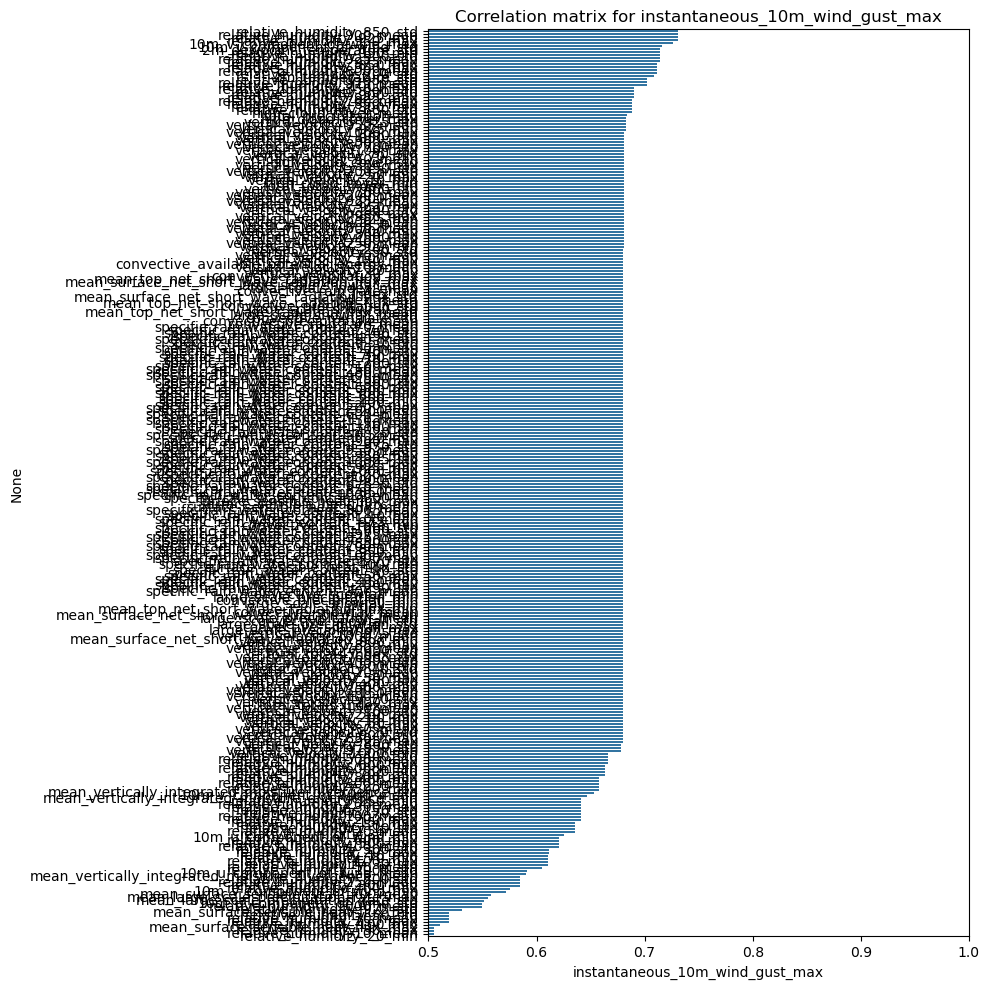

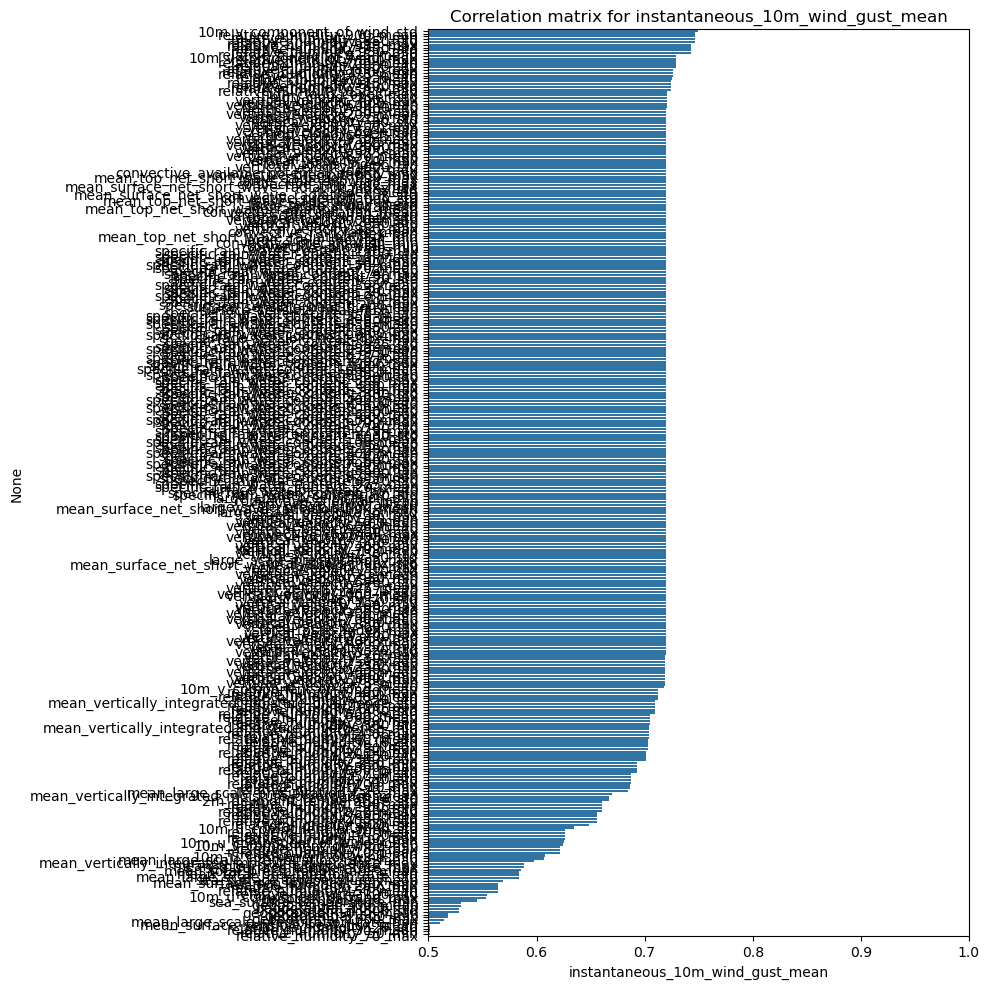

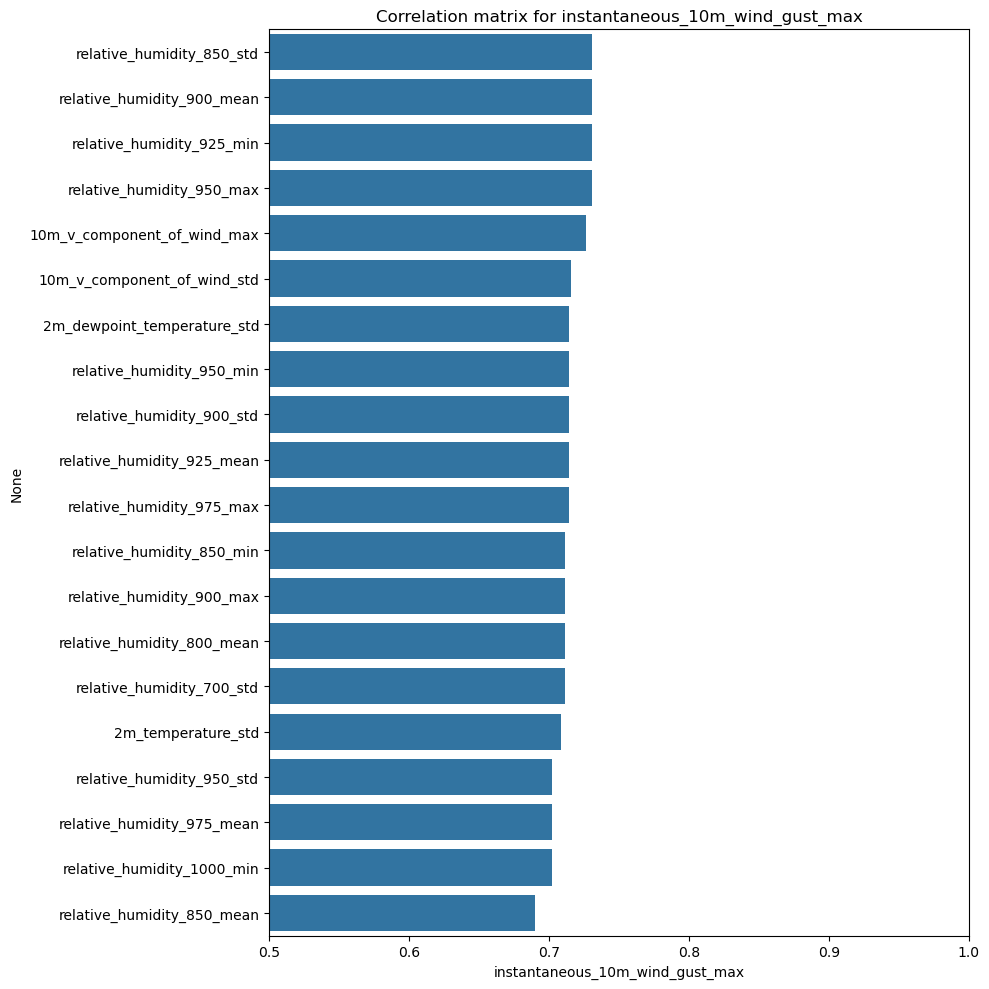

In [13]:
# Sort the data by correlation
sorted_corr_max = corr_inst_max.sort_values(by='instantaneous_10m_wind_gust_max', ascending=False)

# Plot with sorted data
plt.figure(figsize=(10, 10))
sns.barplot(
    x=sorted_corr_max['instantaneous_10m_wind_gust_max'], 
    y=sorted_corr_max.index, 
    order=sorted_corr_max.index
)
plt.title('Correlation matrix for instantaneous_10m_wind_gust_max')
plt.xlim(0.5, 1)
plt.tight_layout()
plt.savefig('pre_processing/feature_selection/plots/correlation_matrix_i10fg_timeseries_max.png', dpi=300)
plt.show()

# Sort the data by correlation
sorted_corr_mean = corr_inst_mean.sort_values(by='instantaneous_10m_wind_gust_mean', ascending=False)

# Plot with sorted data
plt.figure(figsize=(10, 10))
sns.barplot(
    x=sorted_corr_mean['instantaneous_10m_wind_gust_mean'], 
    y=sorted_corr_mean.index, 
    order=sorted_corr_mean.index
)
plt.title('Correlation matrix for instantaneous_10m_wind_gust_mean')
plt.xlim(0.5, 1)
plt.tight_layout()
plt.savefig('pre_processing/feature_selection/plots/correlation_matrix_i10fg_timeseries_mean.png', dpi=300)
plt.show()


# only show the top 20 variables
corr_inst_max_20 = sorted_corr_max.head(20)
corr_inst_mean_20 = sorted_corr_mean.head(20)

# Plot with sorted data
plt.figure(figsize=(10, 10))
sns.barplot(
    x=corr_inst_max_20['instantaneous_10m_wind_gust_max'], 
    y=corr_inst_max_20.index, 
    order=corr_inst_max_20.index
)
plt.title('Correlation matrix for instantaneous_10m_wind_gust_max') 
plt.xlim(0.5, 1)
plt.tight_layout()
